In [86]:
# Let us have a log at the log data then
from config import *

import datetime
import json
import os
import random
from PIL import Image


def read_emotions(logfile=EMOTIONLOG):
    emotions = {}
    times = {}
    
    with open(logfile, 'r') as f:
        for line in f:
            parts = line.rstrip().split(',', 2)
            
            if len(parts)<3:
                continue
                
            id_, dt, result = parts
            id_ = int(id_)
            dt = datetime.datetime.fromisoformat(dt)
            times[id_] = dt
            
            emotion = json.loads(result)[0]['emotion']
            emotions[id_] = emotion
    return emotions, times
    
def read_behavior(logfile=BEHAVIORLOG):
    behavior = {}
    
    with open(logfile, 'r') as f:
        for line in f:
            parts = line.rstrip().split(',', 2)
            
            if len(parts)<3:
                continue
                
            id_, dt, result = parts
            id_ = int(id_)
            #dt = datetime.fromisoformat(dt)
            behavior[id_] = json.loads(result)
    return behavior

def read_captures(logdir=CAMSHOT_DIR):
    captures = {}
    
    for filename in os.listdir(logdir):
        basename, ext = os.path.splitext(filename)
        
        if ext.lower() not in ['.jpg', '.png']:
            continue
        
        id_, number = basename.split('_')
        id_ = int(id_)
        
        if int(number)!=0:
            continue
        img = Image.open(os.path.join(logdir, filename))
        captures[id_] = img
    return captures

def read_screenshots(logdir=SCREENSHOT_DIR):
    shots = {}
    
    for filename in os.listdir(logdir):
        basename, ext = os.path.splitext(filename)
        
        if ext.lower() not in ['.jpg', '.png']:
            continue
        
        id_ = int(basename)
        
        img = Image.open(os.path.join(logdir, filename))
        shots[id_] = img
    return shots

In [87]:
behavior = read_behavior()
emotions, times = read_emotions()
captures = read_captures()
screenshots = read_screenshots()

print(len(behavior), len(emotions), len(captures), len(screenshots))

7030 7030 407 167


In [29]:
# Let's consider the more interesting ones by filtering

# Filter by detected emotion
ids_by_emotion = {}
for emotion in set(emotions.values()):
    ids_by_emotion[emotion] = [id_ for id_ in emotions.keys() if emotions[id_]==emotion]

In [30]:
ids_by_emotion.keys()

dict_keys(['happiness', 'neutral', 'sadness', 'anger', 'surprise'])

In [78]:
emotion = 'happiness'

ids = sorted(ids_by_emotion[emotion])
print("%d relevant logs" % len(ids))

# Find for which IDs we have a capture available
ids = [id_ for id_ in ids if id_ in captures.keys()]
print("%d relevant logs with captures" % len(ids))

# Find for which IDs we also have a screenshot
ids = [id_ for id_ in ids if id_ in screenshots.keys()]
print("%d relevant logs with screenshots" % len(ids))

43 relevant logs
43 relevant logs with captures
21 relevant logs with screenshots


In [88]:
import random

#id_ = random.choice(ids)
id_ = ids[1]
print(id_)

print("Detected emotion:", emotions[id_])
print("Behavior at the time:", behavior[id_])

# Showing the capture
#captures[id_]

8
Detected emotion: happiness
Behavior at the time: {'title': 'mirror', 'class': 'dolphin, dolphin'}


In [89]:
#screenshots[id_]

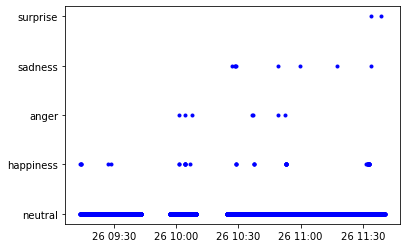

In [100]:
# Now show emotions over time
import matplotlib.pyplot as plt
%matplotlib inline

x = []
y = []

for id_ in sorted(list(emotions.keys())):
    #x.append(id_)
    x.append(times[id_])
    y.append(emotions[id_])
    
plt.plot(x, y, 'b.')